# 1. K-means clustering:无监督学习聚类分析方法
-  问题：对平面上的点集$\{(x_n,y_n)\}_{n=1}^{N}$做聚类分析
-  约定：事先给定需要聚类的类别数（簇数）
-  算法：  
    1. 随机选取代表点$\{u_k\}_{k=1}^2$
    2. 遍历所有点，通过计算各店与代表点之间的距离$\left \| x_n-u_k \right \|$将其归入距离最小的一类 ,通过矩阵$r_{nk}$记录:  
        $$r_{nk}=\left\{\begin{matrix}1,x_n\in u_k \\0,otherwise \end{matrix}\right.$$
    3. 用重心公式更新当前代表点的值：
        $$u_k=\frac{\sum{x_n}}{N_k} (k=1,2)$$
        或是更加智能的：
        $$u_k=\frac{\sum_{n=1}^{N}{r_{nk}x_n}}{\sum_{n=1}^{N}{r_{nk}}}$$
        即由各个簇的重心构成新的代表点。
    4. 反复执行1-3，直至中心点坐标不再发生变化。
    
      
# 2. K-means的数学原理证明
![K-means](./data/learn_WML_chapter_6_clustering.jpg)

## eg. 用K-means算法做图像褪色处理
![图像褪色处理结果](./data/learn_WML_chapter_6_ResultOfKMeans.jpg "图像褪色处理效果图")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def run_kmeans(pixels,k):
    print("=========================================================================================")
    print("K-means(K={})".format(k))
    cls=[0]*len(pixels)
    
    # 初始代表点
    center=[]
    for i in range(k):
        center.append(np.array([np.random.randint(256) for i in range(3)]))
    print("Initial centers:")
    print(center)
    print("======================================")
    distortion=0.0
    
    # 最多迭代计算50次
    for iter_item in range(50):
        center_new=[]
        for i in range(k):
            center_new.append(np.array([0,0,0]))
        num_point=[0]*k
        distortion_new=0.0
        
        for pix,point in enumerate(pixels):
            min_dist=256*256*3  # 可能的最大距离
            point=np.array(point)
            for i in range(k):
                d=sum(x*x for x in point-center[i])
                if d< min_dist:
                    cls[pix]=i # 像素pix属于第i类
                    min_dist=d
            center_new[cls[pix]]+=point
            num_point[cls[pix]]+=1
            distortion_new+=min_dist
        
        # 更新代表点坐标
        for i in range(k):
            if num_point[i]==0:
                center_new[i]=np.array([0,0,0])
            else:
                center_new[i]=center_new[i] // num_point[i] # 像素值必须是int值
        center=center_new
        # print(center)
        print("Distortion:J={}".format(distortion_new))
        
        if iter_item>0 and distortion-distortion_new<distortion*0.0001:
            break # distortion 变化率过小，停止迭代
        distortion=distortion_new
    new_pixels=[]
    for pix in range(len(pixels)):
        new_pixels.append(tuple(center[cls[pix]]))
        
    print("Done.")
    print("=========================================================================================")
    return new_pixels

K-means(K=1)
Initial centers:
[array([250, 184, 194])]
Distortion:J=5818909039.0
Distortion:J=3268053375.0
Distortion:J=3268053375.0
Done.
K-means(K=2)
Initial centers:
[array([ 26, 222,   7]), array([113,  36, 147])]
Distortion:J=5797180558.0
Distortion:J=2012481271.0
Distortion:J=1106346321.0
Distortion:J=930774851.0
Distortion:J=903587585.0
Distortion:J=899539273.0
Distortion:J=899089043.0
Distortion:J=899089043.0
Done.
K-means(K=4)
Initial centers:
[array([123,  17,  23]), array([165,  83, 119]), array([ 70, 186,  40]), array([  0, 238, 142])]
Distortion:J=3296269400.0
Distortion:J=958682577.0
Distortion:J=653275984.0
Distortion:J=444883240.0
Distortion:J=410428193.0
Distortion:J=402077000.0
Distortion:J=398870755.0
Distortion:J=397564882.0
Distortion:J=396922931.0
Distortion:J=396508942.0
Distortion:J=396343136.0
Distortion:J=396210023.0
Distortion:J=396011513.0
Distortion:J=396011513.0
Done.
K-means(K=8)
Initial centers:
[array([207, 193,   6]), array([ 21, 143, 201]), array([217

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


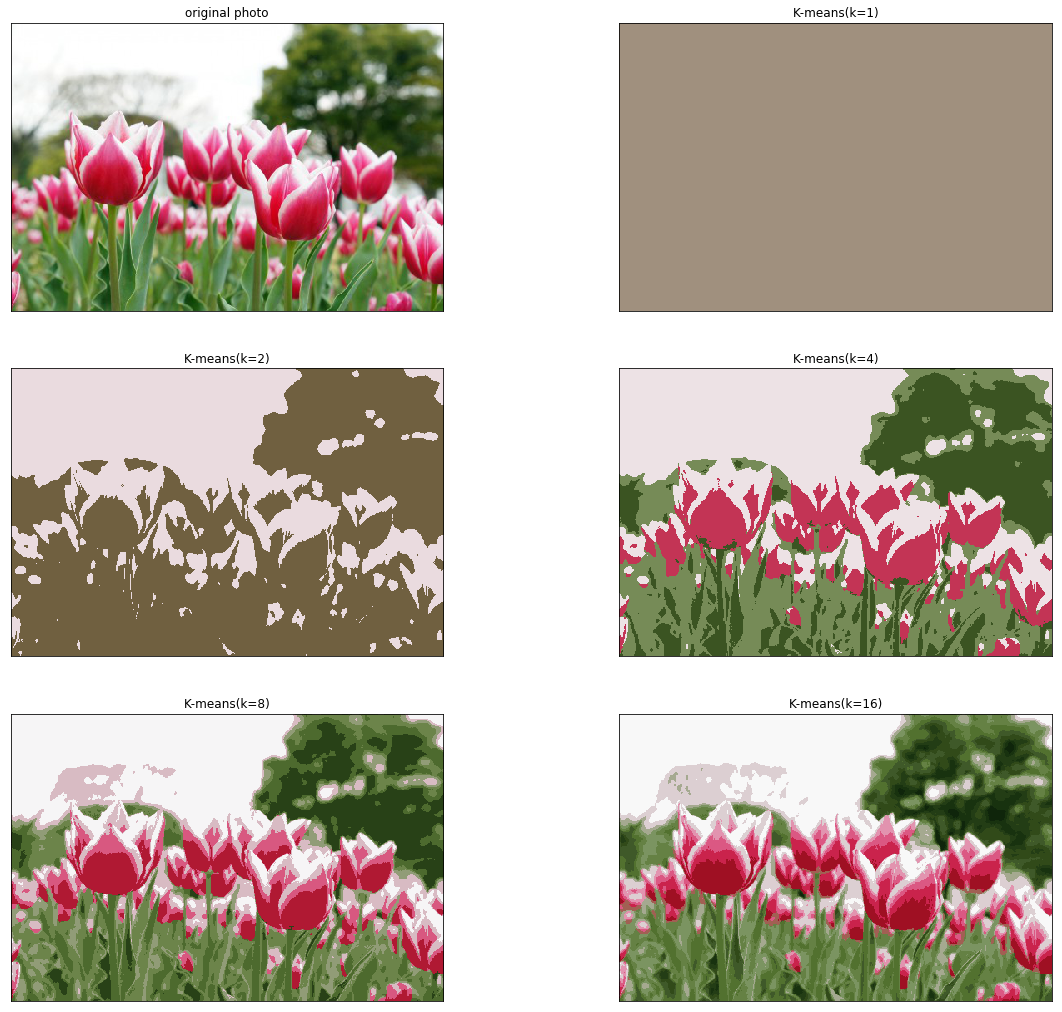

In [6]:
original_img=Image.open("./data/photo.jpg")
pixels=list(original_img.convert("RGB").getdata())
img=original_img.copy()
fig=plt.figure(figsize=(20,18))
subplot=fig.add_subplot(3,2,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.set_title("original photo")
subplot.imshow(original_img)

prepared_k=[1,2,4,8,16]
for i in range(len(prepared_k)):
    result=run_kmeans(pixels,prepared_k[i])
    img.putdata(result)
    subplot=fig.add_subplot(3,2,i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title("K-means(k={})".format(prepared_k[i]))
    subplot.imshow(img)

fig.show()

## 水果的例子

K-means(K=5)
Initial centers:
[array([ 74, 198,  57]), array([101, 223,  32]), array([ 17,  26, 137]), array([171, 184,  69]), array([188, 195,  72])]
Distortion:J=10450555625.0
Distortion:J=1548047456.0
Distortion:J=917523486.0
Distortion:J=717793543.0
Distortion:J=611892059.0
Distortion:J=584219172.0
Distortion:J=583679568.0
Distortion:J=583663359.0
Done.


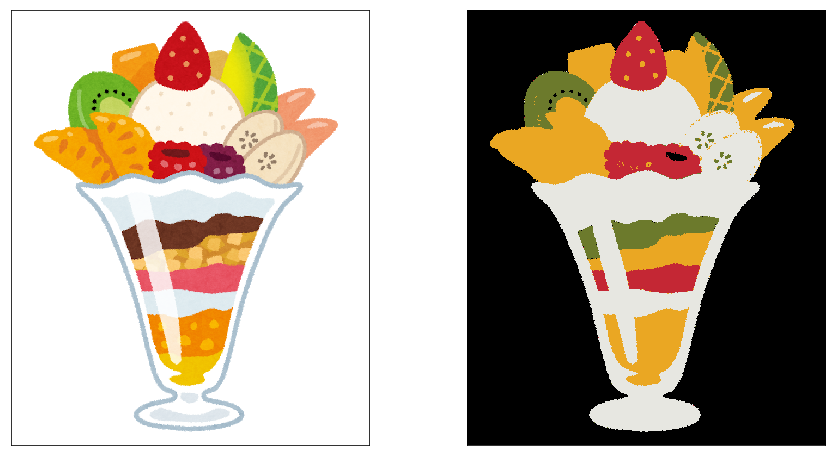

In [9]:
# original picture
img_fruit=Image.open("./data/sweets_fruit_pafe.png")
fig = plt.figure(figsize=(15,8))
subplot = fig.add_subplot(1,2,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(img_fruit)
# clustering
pixels=list(img_fruit.convert("RGB").getdata())
result=run_kmeans(pixels=pixels,k=5)
img_fruit.putdata(result)
subplot = fig.add_subplot(1,2,2)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(img_fruit)

## 这是个二傻？(k=5聚类结果)
![这是个二傻](./data/shifaqiang_k5.png "这是个二傻")

In [ ]:
# original picture
img_fruit=Image.open("./data/shifaqiang.JPG")
fig = plt.figure(figsize=(15,8))
subplot = fig.add_subplot(1,2,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(img_fruit)
# clustering
pixels=list(img_fruit.convert("RGB").getdata())
result=run_kmeans(pixels=pixels,k=3)
img_fruit.putdata(result)
subplot = fig.add_subplot(1,2,2)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(img_fruit)

# 3. KNN(K nearst neighborhood)(监督学习算法)
对于新来的数据点x，计算x与之前所有训练集数据点之间的距离，选择距离最近的K个邻居，由这K个邻居投票决定x属于哪一类。  
**NOET ONE . 这其中距离的定义是一个关键点，譬如欧式距离、曼哈顿距离、契比雪夫距离等**  
**NOET TWO . 参与投票的邻居个数K的确定**